In [398]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import scipy.stats as stats
import matplotlib.pyplot as plt

In [399]:
# Read the CSV file
df = pd.read_csv("O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\DMI Long Data Series\\1876 Data\\DMIRep21-02\\dk_daily_pr_esbjerg_blended_1874_2025.csv", delimiter = ';')

In [400]:
df

,stat_no,year,month,day,hour,pr
0,25140,1874,1,1,8,1.3
1,25140,1874,1,2,8,1.0
2,25140,1874,1,3,8,2.3
3,25140,1874,1,4,8,6.8
4,25140,1874,1,5,8,3.7
...,...,...,...,...,...,...
55207,534020,2025,2,24,23,19.6
55208,534020,2025,2,25,23,1.0
55209,534020,2025,2,26,23,0.2
55210,534020,2025,2,27,23,0.8


In [895]:
# Filter data between 1874 and 2024
df = df[(df["year"] >= 1874) & (df["year"] <= 2023)]

In [896]:
# Find maximum 'pr' for each unique 'year'
max_pr_per_year = df.groupby("year")["pr"].max().reset_index()

In [897]:
max_pr_per_year

,year,pr
0,1874,35.8
1,1875,27.9
2,1876,28.5
3,1877,20.4
4,1878,37.2
...,...,...
145,2019,43.2
146,2020,29.9
147,2021,44.6
148,2022,22.0


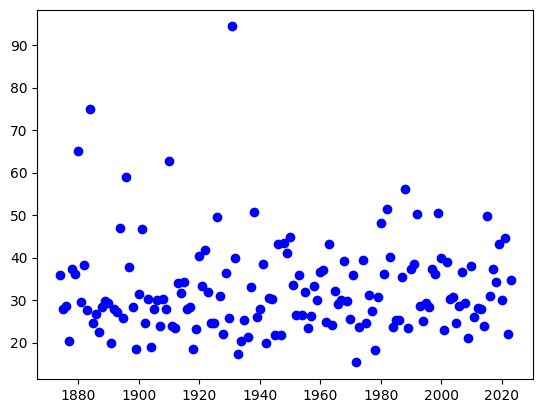

In [898]:
plt.scatter(max_pr_per_year['year'], max_pr_per_year['pr'], color='blue', label='Precipitation (pr)')


In [899]:
block_max_pr = max_pr_per_year.pr.to_numpy()

In [900]:
block_max_pr

array([35.8, 27.9, 28.5, 20.4, 37.2, 36.2, 65. , 29.5, 38.2, 27.7, 75. ,
       24.6, 26.6, 22.5, 28.4, 29.7, 29.3, 19.8, 28. , 27.2, 47. , 25.8,
       59. , 37.7, 28.4, 18.5, 31.5, 46.8, 24.7, 30.2, 19. , 28. , 29.9,
       23.9, 30.2, 27.9, 62.7, 24. , 23.4, 34. , 31.7, 34.2, 28. , 28.4,
       18.4, 23.2, 40.4, 33.4, 41.8, 31.8, 24.6, 24.6, 49.6, 31. , 22.1,
       36.3, 25.8, 94.4, 40. , 17.4, 20.3, 25.2, 21.4, 33. , 50.7, 26.1,
       28. , 38.6, 20. , 30.4, 30.2, 21.8, 43.2, 21.7, 43.4, 41. , 44.8,
       33.5, 26.5, 36. , 26.4, 32. , 23.4, 26.3, 33.2, 29.9, 36.7, 37.1,
       24.8, 43.3, 24.2, 32.1, 29.1, 30. , 39.3, 29.7, 25.6, 36. , 15.3,
       23.6, 39.4, 24.6, 31.2, 27.5, 18.2, 30.6, 48.2, 36.1, 51.4, 40.1,
       23.6, 25.2, 25.4, 35.4, 56.1, 23.3, 37.3, 38.4, 50.2, 28.6, 25.1,
       29.2, 28.3, 37.3, 36.1, 50.4, 40. , 22.9, 38.9, 30.2, 30.7, 24.7,
       28.7, 36.5, 29.4, 21. , 38. , 26. , 28.2, 28. , 23.8, 49.9, 30.9,
       37.3, 34.2, 43.2, 29.9, 44.6, 22. , 34.6])

In [978]:
#Fit EVDs
# Fit Generalized Extreme Value (GEV) distribution
gev_shape, gev_loc, gev_scale = stats.genextreme.fit(block_max_pr)

# Fit Gumbel (Equivalent to GEV with shape = 0)
gumbel_loc, gumbel_scale = stats.gumbel_r.fit(block_max_pr)

In [979]:
# Number of bootstrap samples
n_bootstrap = 1000
gumbel_loc_bs_all = []
gumbel_scale_bs_all = []
                                              
# Bootstrapping loop
for _ in range(n_bootstrap):
    # Resample block maxima with replacement
    resampled_data = np.random.choice(block_max_pr, size=len(block_max_pr), replace=True)
    
    # Fit Gumbel distribution to resampled data
    gumbel_loc_bs, gumbel_scale_bs = stats.gumbel_r.fit(resampled_data)
    
    # Store fitted parameters
    gumbel_loc_bs_all.append((gumbel_loc_bs,))
    gumbel_scale_bs_all.append((gumbel_scale_bs,))

In [903]:
gumbel_loc_bs_all

[(28.21200040804227,),
 (27.41441105585423,),
 (27.37232669818971,),
 (28.81771771824103,),
 (28.431948019697646,),
 (28.203572762357282,),
 (27.770926062038075,),
 (27.493669338028877,),
 (28.321954895282126,),
 (27.25523731435164,),
 (27.825298275629947,),
 (27.935936025068724,),
 (28.160838137557192,),
 (28.760048836885435,),
 (27.790327683141946,),
 (28.46489741708101,),
 (27.74804994999753,),
 (28.280780830292954,),
 (29.443612783289982,),
 (27.453926420470168,),
 (28.427587064082225,),
 (28.14433304456032,),
 (28.29702669040501,),
 (29.068818219200935,),
 (28.439875051178333,),
 (29.10726472899811,),
 (27.153226976302115,),
 (27.559974073817163,),
 (27.134193492888794,),
 (27.97893997298773,),
 (27.692582257425276,),
 (27.23405435833613,),
 (28.002415145522114,),
 (27.546279212488322,),
 (27.917094477662598,),
 (28.697019463623285,),
 (27.467482975887748,),
 (27.734636516995206,),
 (28.29603400142062,),
 (26.643837835649894,),
 (26.98290154699644,),
 (27.883743864854313,),
 (28.5

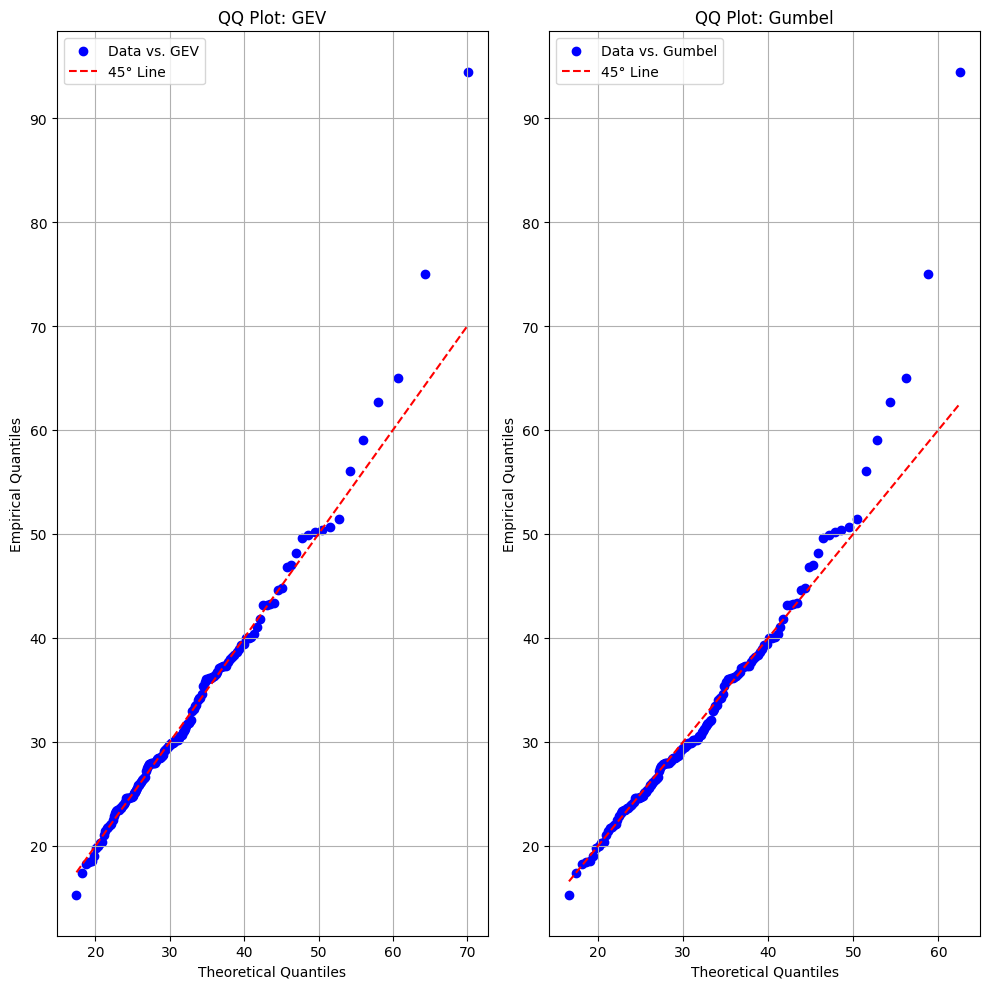

In [904]:
# Define distributions to compare
distributions = {
    "GEV": (stats.genextreme, gev_shape, gev_loc, gev_scale),
    "Gumbel": (stats.gumbel_r, 0, gumbel_loc, gumbel_scale),
}

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes = axes.flatten()
quantiles = np.linspace(0.01, 0.99, len(block_max_pr))


for i, (name, (dist, shape, loc, scale)) in enumerate(distributions.items()):
    # Compute theoretical quantiles correctly
    if name == "Gumbel":
        theoretical_quantiles = dist.ppf(quantiles, loc=loc, scale=scale)  # No shape parameter
    else:
        theoretical_quantiles = dist.ppf(quantiles, shape, loc=loc, scale=scale)  # With shape parameter

    # Sort observed block maxima
    sorted_data = np.sort(block_max_pr)

    # Plot QQ plot
    axes[i].scatter(theoretical_quantiles, sorted_data, color="blue", label="Data vs. " + name)
    axes[i].plot(theoretical_quantiles, theoretical_quantiles, color="red", linestyle="--", label="45° Line")

    # Formatting
    axes[i].set_title(f"QQ Plot: {name}")
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Empirical Quantiles")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [905]:
ks_stat_gumbel, p_value_gumbel = stats.kstest(block_max_pr, 'gumbel_r', args=(gumbel_loc, gumbel_scale))

# KS Test for GEV Distribution
ks_stat_gev, p_value_gev = stats.kstest(block_max_pr, 'genextreme', args=(gev_shape, gev_loc, gev_scale))


In [906]:
print(f"Gumbel KS Test statistic: {ks_stat_gumbel}, p-value: {p_value_gumbel}")
print(f"GEV KS Test statistic: {ks_stat_gev}, p-value: {p_value_gev}")


Gumbel KS Test statistic: 0.0679426289670893, p-value: 0.47236355725962587
GEV KS Test statistic: 0.04552398317807527, p-value: 0.9008646320851703


In [921]:
#Import GMST anomalies (relative to 1850-1900)
#Pathway to GMST 
GMST_file_path = glob.glob(f"O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\Berkeley_GMST\\*anomalies.nc")
    
#Open GMST file
GMST_ds = xr.open_dataset(GMST_file_path[0])
    
#Create year variable 
GMST_ds['year'] = GMST_ds['time']
    
#Calculate rolling mean
GMST_ds['tas'] = GMST_ds.temperature.rolling(time=4).mean()
    
# Select data from 1989 to 2019
GMST_ds = GMST_ds.sel(
time=(
(GMST_ds["year"] >= 1874) &  # Select years >= 1874
(GMST_ds["year"] <= 2024)  # Select years <= 2023
), drop = True)
    
#Save to dataframe
GMST_df = GMST_ds.tas.to_dataframe().reset_index()

In [908]:
GMST_df

,time,lat,lon,tas
0,1874.0,0.0,0.0,0.013979
1,1875.0,0.0,0.0,0.010678
2,1876.0,0.0,0.0,-0.008266
3,1877.0,0.0,0.0,0.062551
4,1878.0,0.0,0.0,0.167767
...,...,...,...,...
145,2019.0,0.0,0.0,1.218940
146,2020.0,0.0,0.0,1.217459
147,2021.0,0.0,0.0,1.202574
148,2022.0,0.0,0.0,1.214449


In [909]:
GMST = GMST_df.tas.to_numpy()

In [910]:
GMST

array([ 0.01397853,  0.01067833, -0.00826556,  0.06255139,  0.1677674 ,
        0.19381088,  0.20791273,  0.15469763,  0.06888798,  0.05074289,
        0.00849344, -0.05350795, -0.10782047, -0.15770558, -0.11534926,
       -0.05015309, -0.04979   , -0.01142937, -0.04044697, -0.09335057,
       -0.07376201, -0.06743233, -0.02177449,  0.02028608,  0.01100452,
        0.02755988,  0.04794765,  0.04514379,  0.05504498, -0.00207054,
       -0.09939795, -0.13068524, -0.10413822, -0.0920378 , -0.07448755,
       -0.11823256, -0.17190841, -0.18709028, -0.17383775, -0.13974577,
       -0.07069211,  0.01482859,  0.02261904, -0.01105319, -0.0472102 ,
       -0.08558844, -0.05173138,  0.03063419,  0.04918019,  0.06356744,
        0.05938831,  0.05510042,  0.1055505 ,  0.11938183,  0.13849774,
        0.10206684,  0.08781403,  0.11555357,  0.13138011,  0.143942  ,
        0.13824046,  0.10336483,  0.09525056,  0.17279318,  0.21372312,
        0.26624382,  0.3248315 ,  0.33206296,  0.34249657,  0.36

In [911]:
#Linear regression to obtain scaling of smoothed GMST with Rx1day
from sklearn.linear_model import LinearRegression

# Reshape GMST for fitting
GMST_reshaped = GMST.reshape(-1, 1)
model = LinearRegression()
model.fit(GMST_reshaped, block_max_pr)
predicted_pr = model.predict(GMST_reshaped)

In [912]:
slope = model.coef_[0] #scaling factor for EVD

In [913]:
slope  #scaling factor EVD

1.7521077

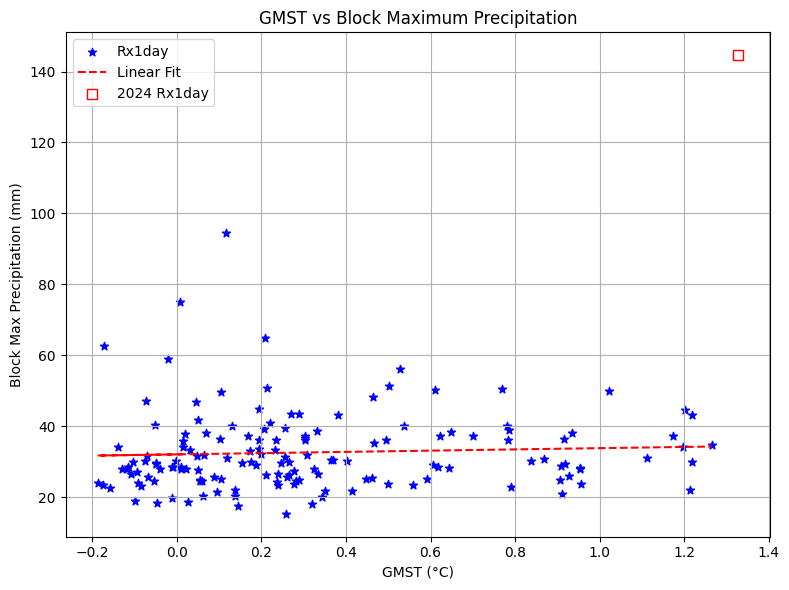

In [914]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(GMST[0:150], block_max_pr[0:150], color='blue', marker = '*', label='Rx1day')

# Adding labels and title
plt.xlabel('GMST (°C)')
plt.ylabel('Block Max Precipitation (mm)')
plt.title('GMST vs Block Maximum Precipitation')

# Plot the linear trendline
plt.plot(GMST, predicted_pr, color='red', linestyle='--', label='Linear Fit')

plt.scatter(1.328, 144.6, color='red', marker='s', s=50, facecolors = 'none', label= '2024 Rx1day')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [915]:
GMST_df

,time,lat,lon,tas
0,1874.0,0.0,0.0,0.013979
1,1875.0,0.0,0.0,0.010678
2,1876.0,0.0,0.0,-0.008266
3,1877.0,0.0,0.0,0.062551
4,1878.0,0.0,0.0,0.167767
...,...,...,...,...
145,2019.0,0.0,0.0,1.218940
146,2020.0,0.0,0.0,1.217459
147,2021.0,0.0,0.0,1.202574
148,2022.0,0.0,0.0,1.214449


In [922]:
# Filter data for 1900 and 2024
GMST_df_1900 = GMST_df[(GMST_df["time"] == 1900)] #range or single year?

GMST_df_2024 =GMST_df[(GMST_df["time"] == 2024)] #range or single year?

In [923]:
GMST_df_1900 = GMST_df_1900.tas.mean()

In [924]:
GMST_df_2024 = GMST_df_2024.tas.mean()

In [925]:
GMST_df_2024

1.3282766

In [926]:
GMST_df_1900

0.047947653

In [927]:
gumbel_loc, gumbel_scale

(28.04564427366762, 7.511453062103609)

In [928]:
#Scaling factor applied to location and scale of EVD (Philip et al. 2020)

In [929]:
gumbel_loc_1900 = gumbel_loc*np.exp((slope*GMST_df_1900)/gumbel_loc)
gumbel_loc_2024 = gumbel_loc*np.exp((slope*GMST_df_2024)/gumbel_loc)

In [930]:
gumbel_scale_1900 = gumbel_scale*np.exp((slope*GMST_df_1900)/gumbel_scale)
gumbel_scale_2024 = gumbel_scale*np.exp((slope*GMST_df_2024)/gumbel_scale)

In [934]:
gumbel_loc_bs_1900

array([[28.29613507],
       [27.49854936],
       [27.4564652 ],
       [28.90184974],
       [28.51608171],
       [28.28770746],
       [27.85506271],
       [27.57780727],
       [28.40608907],
       [27.33937637],
       [27.90943468],
       [28.02007192],
       [28.24497302],
       [28.84418111],
       [27.87446424],
       [28.54903096],
       [27.8321867 ],
       [28.36491518],
       [29.5277422 ],
       [27.53806454],
       [28.51172077],
       [28.22846801],
       [28.38116097],
       [29.15294918],
       [28.52400871],
       [29.19139553],
       [27.23736652],
       [27.6441117 ],
       [27.21833313],
       [28.06307568],
       [27.77671927],
       [27.31819352],
       [28.08655074],
       [27.6304169 ],
       [28.00123046],
       [28.781152  ],
       [27.55162103],
       [27.81877333],
       [28.38016829],
       [26.72797987],
       [27.06704192],
       [27.96788   ],
       [28.61247749],
       [27.65026896],
       [28.05903507],
       [28

In [931]:
#Bootstrap_params

In [932]:
gumbel_loc_bs_1900 = gumbel_loc_bs_all*np.exp((slope*GMST_df_1900)/gumbel_loc_bs_all)
gumbel_loc_bs_2024 = gumbel_loc_bs_all*np.exp((slope*GMST_df_2024)/gumbel_loc_bs_all)

In [933]:
gumbel_scale_bs_1900 = gumbel_scale_bs_all*np.exp((slope*GMST_df_1900)/gumbel_scale_bs_all)
gumbel_scale_bs_2024 = gumbel_scale_bs_all*np.exp((slope*GMST_df_2024)/gumbel_scale_bs_all)

In [935]:
#Confidence intervals of bootstrapping

In [936]:
loc_1900_ci = np.percentile(gumbel_loc_bs_1900, [2.5, 97.5])
loc_2024_ci = np.percentile(gumbel_loc_bs_2024, [2.5, 97.5])

In [937]:
loc_1900_ci, loc_2024_ci

(array([26.88895917, 29.373097  ]), array([29.23612161, 31.71121154]))

In [938]:
scale_1900_ci = np.percentile(gumbel_scale_bs_1900, [2.5, 97.5])
scale_2024_ci = np.percentile(gumbel_scale_bs_2024, [2.5, 97.5])

In [939]:
scale_1900_ci, scale_2024_ci

(array([6.48843999, 8.65079034]), array([ 9.21029212, 11.24046994]))

In [948]:
# Define return periods (in years)
return_periods = np.array([1, 2, 5, 10, 50, 100, 200, 500, 10000,100000])

# Store results
return_periods_1900_append = []
values_1900_ci_25_append = []
values_1900_ci_975_append = []

# Loop over bootstrapped parameters
for loc, scale in zip(gumbel_loc_bs_1900, gumbel_scale_bs_1900):
    print(loc,scale)
    # Calculate the probabilities (CDF values) for each original value using the new Gumbel parameters
    probabilities_1900 = gumbel_r.cdf(block_max_pr, loc=loc, scale=scale)

    # Calculate
    return_periods_1900 = 1 / (1 - probabilities_1900)
    
    values_1900_ci_25 = gumbel_r.isf(1/return_periods, loc=loc, scale=scale)
    values_1900_ci_975 = gumbel_r.isf(1/return_periods, loc=loc, scale=scale)

    # Store results
    return_periods_1900_append.append(return_periods_1900)
    values_1900_ci_25_append.append(values_1900_ci_25)
    values_1900_ci_975_append.append(values_1900_ci_975)
    
    
# Convert list to NumPy array
return_periods_1900_append = np.array(return_periods_1900_append)
values_1900_ci_25_append = np.array(values_1900_ci_25_append)
values_1900_ci_975_append = np.array(values_1900_ci_975_append)

return_periods_1900_append = np.mean(return_periods_1900_append,axis = 0)
values_1900_ci_25_append = np.percentile(values_1900_ci_25_append,2.5, axis = 0)
values_1900_ci_975_append = np.percentile(values_1900_ci_975_append,97.5, axis = 0)

[28.29613507] [8.15526733]
[27.49854936] [7.26086996]
[27.4564652] [7.40652748]
[28.90184974] [8.34032642]
[28.51608171] [8.22398714]
[28.28770746] [9.33582081]
[27.85506271] [8.25181393]
[27.57780727] [6.77419664]
[28.40608907] [7.80051647]
[27.33937637] [7.55480815]
[27.90943468] [6.79870138]
[28.02007192] [7.86915178]
[28.24497302] [6.94479188]
[28.84418111] [8.40913101]
[27.87446424] [7.3214099]
[28.54903096] [8.23539674]
[27.8321867] [7.63598931]
[28.36491518] [7.62923326]
[29.5277422] [8.65063217]
[27.53806454] [8.37049825]
[28.51172077] [7.59013096]
[28.22846801] [7.87563825]
[28.38116097] [6.57992572]
[29.15294918] [7.50281544]
[28.52400871] [6.8136997]
[29.19139553] [7.6509976]
[27.23736652] [7.60619457]
[27.6441117] [7.20194917]
[27.21833313] [7.00707511]
[28.06307568] [7.79639176]
[27.77671927] [7.83542711]
[27.31819352] [7.25358744]
[28.08655074] [7.83392973]
[27.6304169] [7.66195788]
[28.00123046] [7.68154564]
[28.781152] [7.28140925]
[27.55162103] [7.45037776]
[27.8187733

[28.82665276] [7.47814498]
[28.17039599] [7.00354765]
[28.86868136] [7.66763611]
[28.75565981] [6.98506672]
[27.80277909] [6.99616225]
[28.71476475] [7.70869047]
[29.0975191] [8.17405634]
[27.80154623] [7.87379466]
[28.21760621] [7.68413944]
[29.35380206] [8.53444478]
[27.24499773] [7.43665158]
[27.31240912] [7.59216187]
[27.77568163] [8.14138911]
[27.97844618] [7.13182634]
[27.92509062] [6.92780554]
[29.5018812] [7.79610187]
[28.56176259] [7.24432857]
[27.57566126] [6.96137629]
[26.79773423] [6.96175239]
[27.47976137] [7.68594331]
[28.78865702] [8.12716407]
[28.05275614] [7.39234433]
[27.69770566] [8.27951105]
[28.0609494] [7.91703797]
[27.84066504] [7.51954581]
[27.24861308] [7.59816144]
[26.89557994] [8.07656506]
[29.04652959] [8.73955218]
[28.51125206] [6.8449043]
[28.7107116] [7.22069089]
[28.62941585] [6.4949048]
[27.56352343] [6.95049879]
[27.66534905] [7.63927491]
[28.25042109] [6.93877869]
[28.4125299] [7.42688645]
[27.82240403] [8.01178]
[28.02359045] [7.50640299]
[27.5468130

[27.15023113] [7.55755726]
[28.94986996] [8.71966455]
[29.22338947] [8.02745091]
[27.47958496] [7.56025252]
[27.92101961] [7.75506609]
[28.31784743] [6.84035121]
[28.43571342] [7.27343271]
[27.78884999] [7.40544614]
[28.23036965] [8.22078463]
[29.45330822] [7.85394961]
[29.15299533] [7.81771122]
[28.7034435] [7.38199005]
[27.93343933] [8.35969221]
[28.56833444] [7.35771742]
[28.75338391] [7.80796502]
[29.33754282] [8.51540729]
[29.30003282] [7.04671706]
[28.01361195] [7.5449712]
[27.6248691] [7.66054701]
[28.100541] [7.18666067]
[27.97080214] [7.01395512]
[27.9407045] [7.30866682]
[28.08770675] [6.42756152]
[28.21449652] [7.21772674]
[29.03278295] [7.92437587]
[28.81665928] [7.78017575]
[28.36427651] [8.04146625]
[28.23092023] [7.50025033]
[28.67454389] [7.11468029]
[26.95410391] [6.99346564]
[28.74167527] [7.26188634]
[28.29863789] [7.88051762]
[28.0086602] [7.00148108]
[28.50203356] [7.65519972]
[28.93437597] [7.15975463]
[27.96979042] [7.42331485]
[28.6100957] [7.52141864]
[29.78297

In [949]:
# Define return periods (in years)
return_periods = np.array([1, 2, 5, 10, 50, 100, 200, 500, 10000, 100000])

# Store results
return_periods_2024_append = []
values_2024_ci_25_append = []
values_2024_ci_975_append = []

# Loop over bootstrapped parameters
for loc, scale in zip(gumbel_loc_bs_2024, gumbel_scale_bs_2024):
    print(loc,scale)
    # Calculate the probabilities (CDF values) for each original value using the new Gumbel parameters
    probabilities_2024 = gumbel_r.cdf(block_max_pr, loc=loc, scale=scale)

    # Calculate 
    return_periods_2024 = 1 / (1 - probabilities_2024)
    
    values_2024_ci_25 = gumbel_r.isf(1/return_periods, loc=loc, scale=scale)
    values_2024_ci_975 = gumbel_r.isf(1/return_periods, loc=loc, scale=scale)

    # Store results
    return_periods_2024_append.append(return_periods_2024)
    values_2024_ci_25_append.append(values_2024_ci_25)
    values_2024_ci_975_append.append(values_2024_ci_975)
    
    
# Convert list to NumPy array
return_periods_2024_append = np.array(return_periods_2024_append)
values_2024_ci_25_append = np.array(values_2024_ci_25_append)
values_2024_ci_975_append = np.array(values_2024_ci_975_append)


return_periods_2024_append = np.mean(return_periods_2024_append,axis = 0)
values_2024_ci_25_append = np.percentile(values_2024_ci_25_append,2.5, axis = 0)
values_2024_ci_975_append = np.percentile(values_2024_ci_975_append,97.5, axis = 0)
    

[30.63797111] [10.76836648]
[29.84333536] [9.925345]
[29.80141176] [10.0616867]
[31.24155755] [10.94431865]
[30.85713418] [10.83365146]
[30.62957378] [11.89760833]
[30.19850858] [10.86010543]
[29.92229225] [9.47309335]
[30.74753183] [10.43242099]
[29.68477235] [10.20089669]
[30.25267926] [9.49573137]
[30.36290942] [10.49727052]
[30.58699314] [9.63100194]
[31.18408757] [11.00985041]
[30.21783819] [9.98196242]
[30.88996712] [10.84449693]
[30.1757175] [10.27727861]
[30.70650485] [10.27091761]
[31.86534529] [11.24031878]
[29.88270023] [10.97304796]
[30.85278865] [10.23411718]
[30.57054765] [10.50340301]
[30.72269262] [9.29418158]
[31.49180143] [10.15203878]
[30.86503316] [9.50959465]
[31.53011812] [10.29141211]
[29.58315728] [10.24923196]
[29.98834622] [9.87031308]
[29.56419789] [9.68882712]
[30.40575584] [10.42852616]
[30.12045658] [10.4653968]
[29.66367122] [9.91853929]
[30.42914523] [10.46398201]
[29.97470305] [10.30173598]
[30.34413705] [10.32019141]
[31.12127653] [9.94454528]
[29.8962

[30.9700694] [9.21621196]
[29.90806253] [9.6362966]
[30.00950361] [10.28037238]
[30.59242158] [9.62542393]
[30.75394972] [10.0807762]
[30.16597119] [10.63226236]
[30.36641506] [10.15540846]
[29.89141549] [9.15895283]
[29.86969173] [9.29411587]
[31.04412416] [10.52721886]
[30.1760412] [9.45362975]
[30.74253477] [10.23300591]
[30.21694794] [10.92912793]
[30.16980358] [10.35452228]
[30.4063285] [10.0768673]
[29.612754] [9.68334959]
[30.61730841] [10.17494825]
[29.14675521] [10.10360811]
[31.1283394] [10.58115086]
[31.8847049] [9.79948523]
[30.06136836] [9.31952389]
[29.87261807] [9.81871517]
[29.75031903] [9.76476728]
[29.72185093] [9.81046233]
[29.95323931] [9.97337189]
[30.70760691] [10.3893926]
[30.33412369] [10.27215529]
[30.02645777] [9.98742306]
[29.94246109] [10.28277603]
[31.11637877] [11.14279927]
[31.18669196] [10.29625748]
[29.47260541] [9.45285441]
[30.82973903] [10.33756189]
[30.76755273] [10.45166978]
[29.24613164] [9.00875714]
[30.83408997] [10.08228765]
[30.19219505] [10.4

[30.65920869] [10.61973812]
[31.00509429] [11.46260638]
[30.50387098] [9.25465805]
[30.12346262] [9.97336438]
[30.33580427] [10.06454486]
[30.23555807] [9.89948415]
[30.29509015] [10.22653937]
[30.31128266] [10.16179234]
[29.68007946] [10.05564981]
[30.55958018] [9.7447521]
[29.92473725] [10.13786921]
[30.65673543] [9.76151518]
[29.80654104] [10.25553876]
[31.03875961] [10.2018387]
[30.31170384] [10.63659573]
[30.45475414] [9.89231944]
[29.49636153] [10.20348139]
[31.28941296] [11.3063213]
[31.56200443] [10.64711264]
[29.82444325] [10.20601559]
[30.26422141] [10.38951871]
[30.65960557] [9.53424315]
[30.77705076] [9.93708774]
[30.13254207] [10.060673]
[30.57244244] [10.83060761]
[31.7911568] [10.48290052]
[31.49184741] [10.44866035]
[31.04383824] [10.03868971]
[30.2765953] [10.96275723]
[30.90920257] [10.01595226]
[31.09360482] [10.4394551]
[31.67577573] [11.11118633]
[31.63839093] [9.72567793]
[30.35647313] [10.19164913]
[29.96917618] [10.30040691]
[30.44308449] [9.85604538]
[30.313820

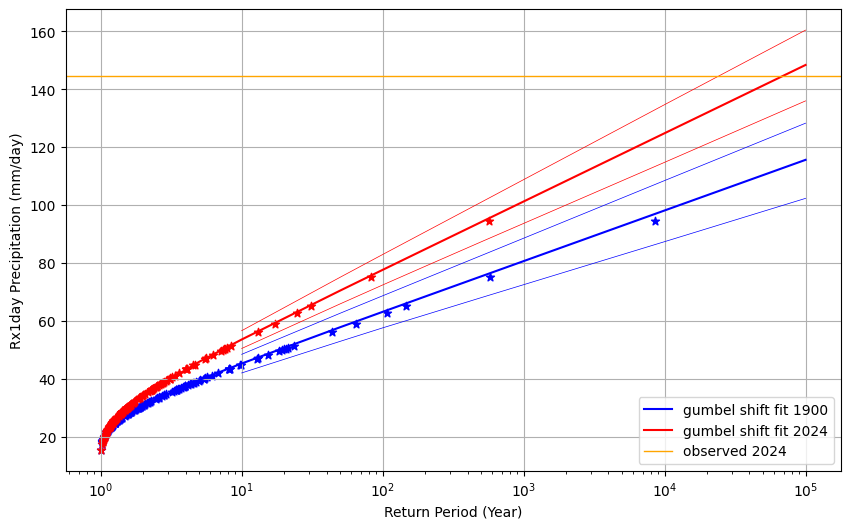

In [950]:
# Define return periods (in years)
return_periods = np.array([1, 2, 5, 10, 50, 100, 200, 500, 10000, 100000])
    
# Compute the corresponding precipitation values for each return period
# Using the Survival Function for the Gumbel distribution
values_1900 = gumbel_r.isf(1/return_periods, loc=gumbel_loc_1900, scale=gumbel_scale_1900)
values_2024 = gumbel_r.isf(1/return_periods, loc=gumbel_loc_2024, scale=gumbel_scale_2024)

#values_1900_ci_25 = gumbel_r.isf(1/return_periods, loc=loc_1900_ci[0], scale=scale_1900_ci[0])
#values_2024_ci_25 = gumbel_r.isf(1/return_periods, loc=loc_2024_ci[0], scale=scale_2024_ci[0])

#values_1900_ci_975 = gumbel_r.isf(1/return_periods, loc=loc_1900_ci[1], scale=scale_1900_ci[1])
#values_2024_ci_975 = gumbel_r.isf(1/return_periods, loc=loc_2024_ci[1], scale=scale_2024_ci[1])

# Calculate the probabilities (CDF values) for each original value using the new Gumbel parameters
#probabilities_1900 = gumbel_r.cdf(block_max_pr, loc=gumbel_loc_1900, scale=gumbel_scale_1900)
# Calculate the return periods based on the new CDF values
#return_periods_1900 = 1 / (1 - probabilities_1900)

# Calculate the probabilities (CDF values) for each original value using the new Gumbel parameters
#probabilities_2024 = gumbel_r.cdf(block_max_pr, loc=gumbel_loc_2024, scale=gumbel_scale_2024)
# Calculate the return periods based on the new CDF values
#return_periods_2024 = 1 / (1 - probabilities_2024)


# Plot the return period vs. the precipitation (extreme values)
plt.figure(figsize=(10, 6))
plt.plot(return_periods, values_1900, color='blue', label="gumbel shift fit 1900")
plt.plot(return_periods, values_2024, color='red', label="gumbel shift fit 2024")

plt.plot(return_periods[3:], values_1900_ci_25_append[3:], color='blue', lw= 0.5)
plt.plot(return_periods[3:], values_2024_ci_25_append[3:], color='red', lw = 0.5)

plt.plot(return_periods[3:], values_1900_ci_975_append[3:], color='blue', lw = 0.5)
plt.plot(return_periods[3:], values_2024_ci_975_append[3:], color='red', lw = 0.5)

plt.scatter(return_periods_1900_append, block_max_pr, marker = '*', color='blue')
plt.scatter(return_periods_2024_append, block_max_pr, marker = '*', color='red')



plt.xlabel('Return Period (Year)')
plt.ylabel('Rx1day Precipitation (mm/day)')
plt.xscale('log')  # Typically return periods are plotted on a log scale3
# Add horizontal pink line at y=144.6
plt.axhline(y=144.6, color='orange', linestyle='-', linewidth=1, label='observed 2024')
plt.grid(True)
plt.legend()
plt.show()

In [943]:
p0 = 1- stats.gumbel_r.cdf(144.6, loc=gumbel_loc_1900, scale=gumbel_scale_1900)

In [974]:
p0

2.1921074655484318e-07

In [944]:
p1 = 1- stats.gumbel_r.cdf(144.6, loc=gumbel_loc_2024, scale=gumbel_scale_2024)

In [975]:
p1

1.4436382551386018e-05

In [945]:
#Calculate probability ratio p1/p0
PR = p1/p0

In [946]:
PR

65.85618076791803

In [951]:
#Calculate FAR (fraction of attributable risk)
FAR = 1- p0/p1

In [952]:
FAR

0.9848153963934825

In [ ]:
#Confidence bands of FAR based on bootstrapped sample

In [955]:
p0_bs_append = []
# Loop over bootstrapped parameters
for loc, scale in zip(gumbel_loc_bs_1900, gumbel_scale_bs_1900):
    p0_bs = 1- stats.gumbel_r.cdf(144.6, loc=loc, scale=scale)
    p0_bs_append.append(p0_bs)
    
p1_bs_append = []
# Loop over bootstrapped parameters
for loc, scale in zip(gumbel_loc_bs_2024, gumbel_scale_bs_2024):
    p1_bs = 1- stats.gumbel_r.cdf(144.6, loc=loc, scale=scale)
    p1_bs_append.append(p1_bs)    
    

In [968]:
p0_bs_append = np.array(p0_bs_append)
p1_bs_append = np.array(p1_bs_append)

In [969]:
FAR_bs = 1 - (p0_bs_append / p1_bs_append)

In [973]:
FAR_bs.min()

0.9438318995448755

In [972]:
FAR_bs.max()

0.9984934240612211